<a href="https://colab.research.google.com/github/RiteshopShrivastava/Decision_tree/blob/main/Assignment_DecisionTree_Company_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree
 
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location


 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
**Problem Statement:**

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#load data
company_df = pd.read_csv('/content/Company_Data.csv')
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
# Categorising Sales based on 'High'(>=7.5) and 'low'(<7.5)
sales_val=[]
for value in company_df['Sales']:
  if value >= 7.5:
    sales_val.append('High')
  else:
      sales_val.append('Low')
company_df['Sales_category']=sales_val

In [ ]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [ ]:
#label encoding for categorical columns
label_encoding = preprocessing.LabelEncoder()
company_df['ShelveLoc']= label_encoding.fit_transform(company_df['ShelveLoc'])
company_df['Urban']= label_encoding.fit_transform(company_df['Urban'])
company_df['US']= label_encoding.fit_transform(company_df['US'])


In [ ]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [ ]:
# drop sales column
company_data= company_df.drop(columns='Sales')

In [ ]:
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Low
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Low
397,162,26,12,368,159,2,40,18,1,1,Low
398,100,79,7,284,95,0,50,12,1,1,Low


In [ ]:
#define dependent & independent variable
x= company_data.iloc[:,0:10]
y=company_data['Sales_category']

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_category, Length: 400, dtype: object

In [ ]:
#Unique categories
company_data.Sales_category.unique()

array(['High', 'Low'], dtype=object)

In [ ]:
#count of unique categories
company_data.Sales_category.value_counts()

Low     201
High    199
Name: Sales_category, dtype: int64

In [ ]:
# split data set into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state= 40)

# **Decision Tree Classifier (C 5.0) using Entropy criteria**

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

Text(0.5, 1.0, ' Decision tree using Entropy (CART)')

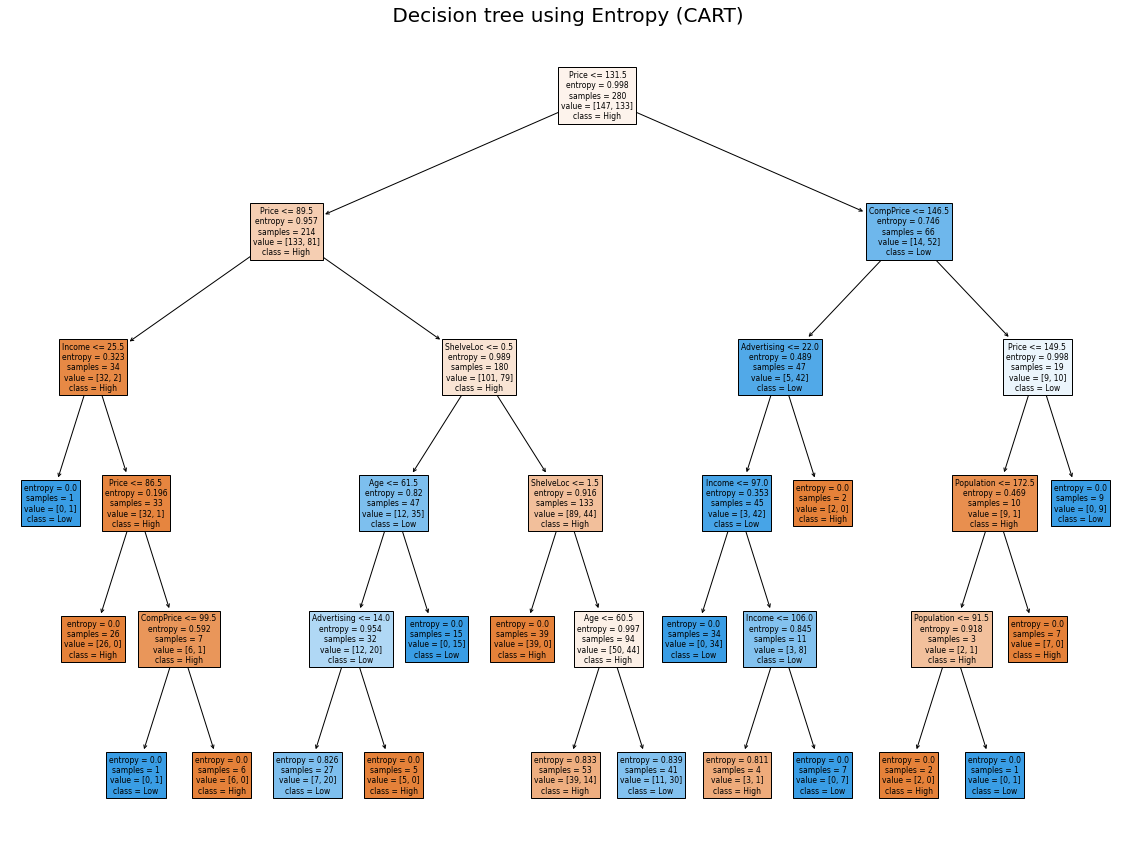

In [ ]:
#Visualizing decision tree
figure= plt.figure(figsize=(20,15))
tree.plot_tree(model, 
               feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], 
               class_names=['High','Low'],
               filled=True);
plt.title(' Decision tree using Entropy (CART)', fontsize=20)

In [ ]:
#predicting on test data
pred = model.predict(x_test)
pd.Series(pred).value_counts()


Low     65
High    55
dtype: int64

In [ ]:
pred

array(['Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'High',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'High', 'High'], dtype=

In [ ]:
# crosstable
pd.crosstab(y_test,pred)

col_0,High,Low
Sales_category,,
High,35,17
Low,20,48


In [ ]:
(35+48)/(35+17+20+48)

0.6916666666666667

In [ ]:
# Accuracy
np.mean(pred==y_test)

0.6916666666666667

**69 % Accuracy**

# **Building Decision Tree Classifier (CART) using Gini Criteria**

In [ ]:
model1 =DecisionTreeClassifier(criterion='gini', max_depth=5)
model1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'Decision tree using Gini impurity(CART)')

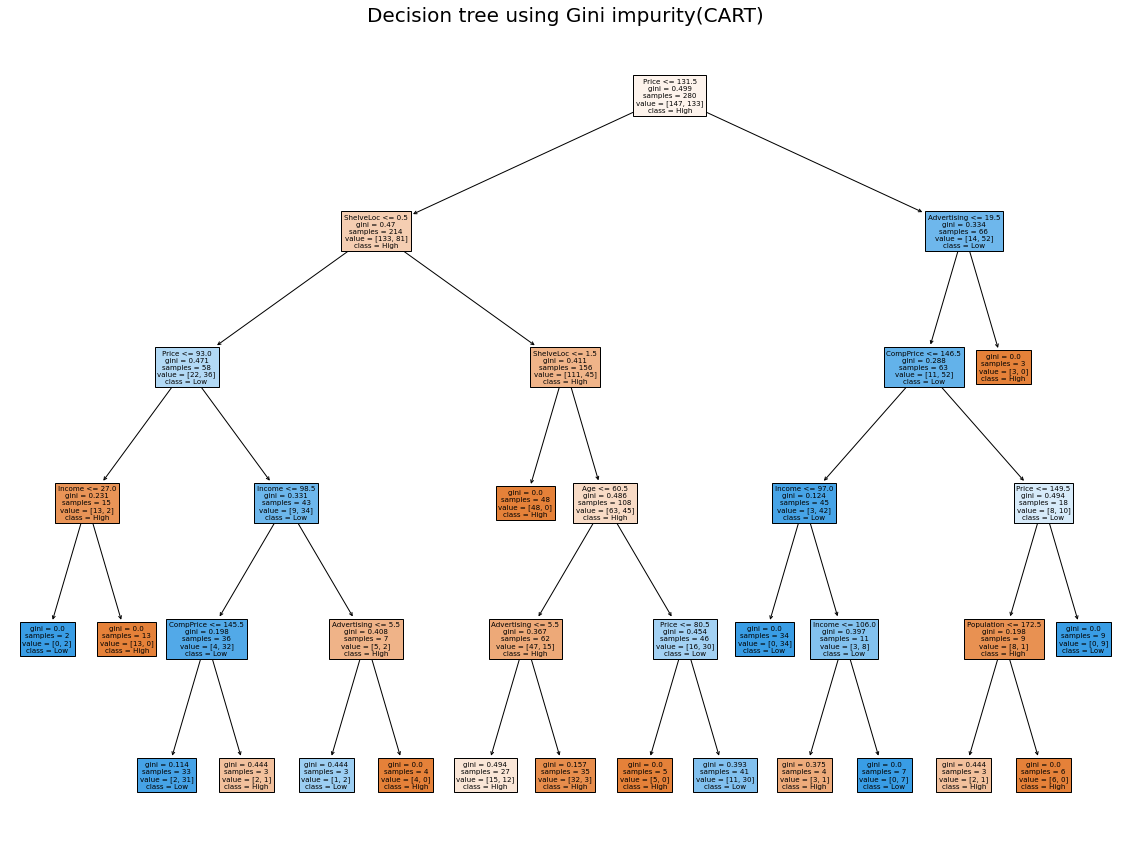

In [ ]:
#Visualizing decision tree
figure= plt.figure( figsize=(20,15))
tree.plot_tree(model1,feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], 
               class_names=['High','Low'],
               filled=True);
plt.title('Decision tree using Gini impurity(CART)', fontsize=20)

In [ ]:
#predicting on test data
pred_gini =model1.predict(x_test)
pd.Series(pred_gini).value_counts()

Low     62
High    58
dtype: int64

In [ ]:
pred_gini

array(['Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'High',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'High'], dty

In [ ]:
# Accuracy
np.mean(pred_gini==y_test)

0.6666666666666666

In [ ]:
# cross table
pd.crosstab(y_test,pred_gini)

col_0,High,Low
Sales_category,,
High,35,17
Low,23,45


In [ ]:
(35+45)/(35+17+23+45)

0.6666666666666666

**66 % Accuracy**